In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d ashenafifasilkebede/dataset


100% 2.92G/2.93G [00:44<00:00, 60.4MB/s]
100% 2.93G/2.93G [00:44<00:00, 70.5MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile("/content/dataset.zip")
zip.extractall('/content/')
zip.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt
import cv2

In [5]:
img = cv2.imread('/content/train/Normal/Normal_100x_74.jpg')
img

array([[[255, 253, 253],
        [255, 253, 253],
        [255, 253, 253],
        ...,
        [251, 128, 154],
        [239, 124, 134],
        [236, 119, 128]],

       [[255, 254, 254],
        [255, 254, 254],
        [255, 254, 254],
        ...,
        [246, 126, 157],
        [241, 126, 146],
        [236, 125, 139]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 125, 164],
        [239, 128, 160],
        [239, 129, 158]],

       ...,

       [[193,  88,  97],
        [196,  90, 107],
        [210, 100, 129],
        ...,
        [255, 235, 254],
        [255, 245, 255],
        [253, 249, 255]],

       [[195,  92,  95],
        [197,  94, 101],
        [208,  98, 126],
        ...,
        [254, 250, 255],
        [253, 252, 254],
        [253, 249, 254]],

       [[199,  99,  95],
        [198,  95, 102],
        [206,  98, 121],
        ...,
        [254, 250, 255],
        [251, 253, 253],
        [251, 253, 247]]

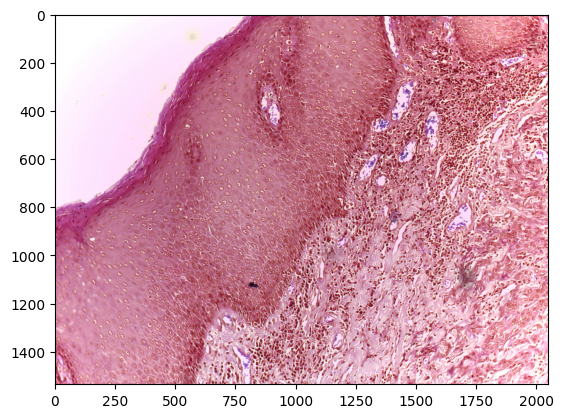

In [6]:
plt.imshow(img)
plt.show()

In [7]:
img.shape

(1536, 2048, 3)

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
              directory='/content/train',
              labels='inferred',
              label_mode='int',
              batch_size=32,
              image_size=(256, 256)
          )


test_ds = tf.keras.utils.image_dataset_from_directory(
              directory='/content/test',
              labels='inferred',
              label_mode='int',
              batch_size=32,
              image_size=(256, 256)
          )

Found 4946 files belonging to 2 classes.
Found 126 files belonging to 2 classes.


In [9]:
def scale_down_px(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

In [10]:
train_ds = train_ds.map(scale_down_px)
test_ds = test_ds.map(scale_down_px)

In [11]:
img/255

array([[[1.        , 0.99215686, 0.99215686],
        [1.        , 0.99215686, 0.99215686],
        [1.        , 0.99215686, 0.99215686],
        ...,
        [0.98431373, 0.50196078, 0.60392157],
        [0.9372549 , 0.48627451, 0.5254902 ],
        [0.9254902 , 0.46666667, 0.50196078]],

       [[1.        , 0.99607843, 0.99607843],
        [1.        , 0.99607843, 0.99607843],
        [1.        , 0.99607843, 0.99607843],
        ...,
        [0.96470588, 0.49411765, 0.61568627],
        [0.94509804, 0.49411765, 0.57254902],
        [0.9254902 , 0.49019608, 0.54509804]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.94117647, 0.49019608, 0.64313725],
        [0.9372549 , 0.50196078, 0.62745098],
        [0.9372549 , 0.50588235, 0.61960784]],

       ...,

       [[0.75686275, 0.34509804, 0.38039216],
        [0.76862745, 0.35294118, 0.41960784],
        [0.82352941, 0

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [15]:
history = model.fit(train_ds,  validation_data = test_ds, epochs=10)

Epoch 1/10
155/155 [==============================] - 68s 372ms/step - loss: 0.7414 - accuracy: 0.5449 - val_loss: 0.6536 - val_accuracy: 0.5635
Epoch 2/10
155/155 [==============================] - 56s 344ms/step - loss: 0.6446 - accuracy: 0.6223 - val_loss: 0.5069 - val_accuracy: 0.7619
Epoch 3/10
155/155 [==============================] - 55s 337ms/step - loss: 0.6066 - accuracy: 0.6731 - val_loss: 0.5990 - val_accuracy: 0.7540
Epoch 4/10
155/155 [==============================] - 53s 325ms/step - loss: 0.5694 - accuracy: 0.7054 - val_loss: 0.7587 - val_accuracy: 0.7540
Epoch 5/10
155/155 [==============================] - 52s 313ms/step - loss: 0.5117 - accuracy: 0.7487 - val_loss: 0.7101 - val_accuracy: 0.6825
Epoch 6/10
155/155 [==============================] - 52s 317ms/step - loss: 0.4501 - accuracy: 0.7843 - val_loss: 0.6595 - val_accuracy: 0.6984
Epoch 7/10
155/155 [==============================] - 52s 316ms/step - loss: 0.3944 - accuracy: 0.8186 - val_loss: 0.6323 - val_ac

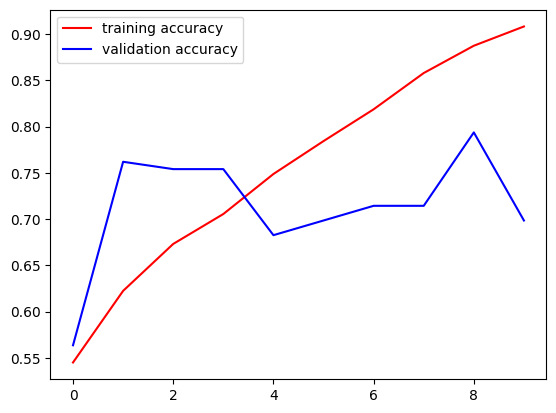

In [16]:
plt.plot(history.history['accuracy'], color='r', label='training accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='validation accuracy')
plt.legend()
plt.show()

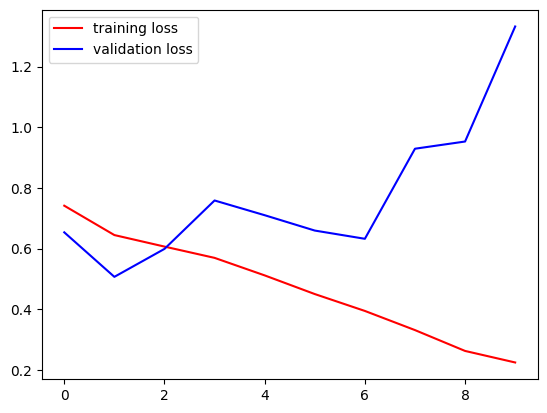

In [17]:
plt.plot(history.history['loss'], color='r', label='training loss')
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.legend()
plt.show()

In [18]:
from keras.layers import BatchNormalization, Dropout

In [19]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [22]:
history = model.fit(train_ds,  validation_data = test_ds, epochs=10)

Epoch 1/10
155/155 [==============================] - 54s 308ms/step - loss: 3.8148 - accuracy: 0.6431 - val_loss: 9.8512 - val_accuracy: 0.2460
Epoch 2/10
155/155 [==============================] - 51s 316ms/step - loss: 1.1271 - accuracy: 0.6662 - val_loss: 3.5277 - val_accuracy: 0.4524
Epoch 3/10
155/155 [==============================] - 53s 326ms/step - loss: 0.7504 - accuracy: 0.7058 - val_loss: 1.0493 - val_accuracy: 0.5714
Epoch 4/10
155/155 [==============================] - 53s 327ms/step - loss: 0.5389 - accuracy: 0.7653 - val_loss: 0.4646 - val_accuracy: 0.8016
Epoch 5/10
155/155 [==============================] - 57s 352ms/step - loss: 0.4612 - accuracy: 0.7932 - val_loss: 0.6036 - val_accuracy: 0.7937
Epoch 6/10
155/155 [==============================] - 52s 316ms/step - loss: 0.4627 - accuracy: 0.7994 - val_loss: 0.4375 - val_accuracy: 0.7937
Epoch 7/10
155/155 [==============================] - 52s 315ms/step - loss: 0.4271 - accuracy: 0.8160 - val_loss: 0.3503 - val_ac

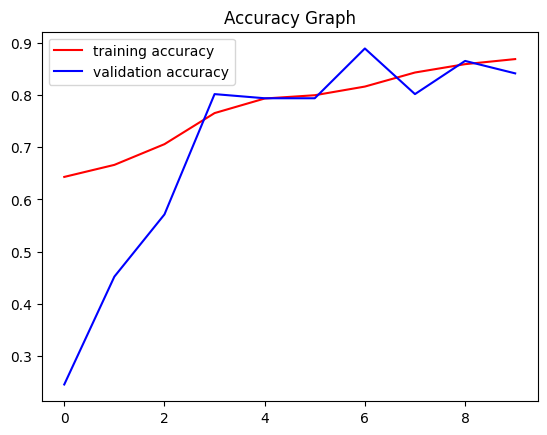

In [45]:
plt.plot(history.history['accuracy'], color='r', label='training accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='validation accuracy')
plt.legend()
plt.title("Accuracy Graph")
plt.show()

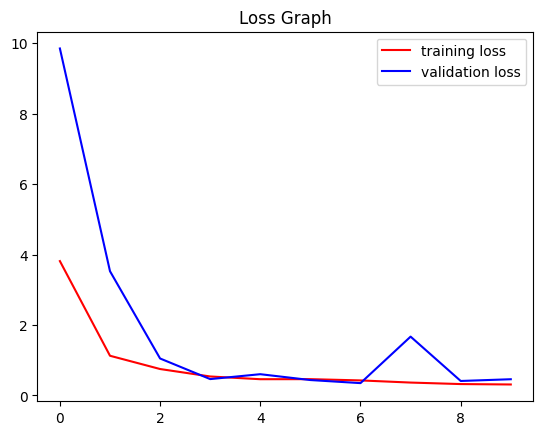

In [44]:
plt.plot(history.history['loss'], color='r', label='training loss')
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.legend()
plt.title("Loss Graph")
plt.show()

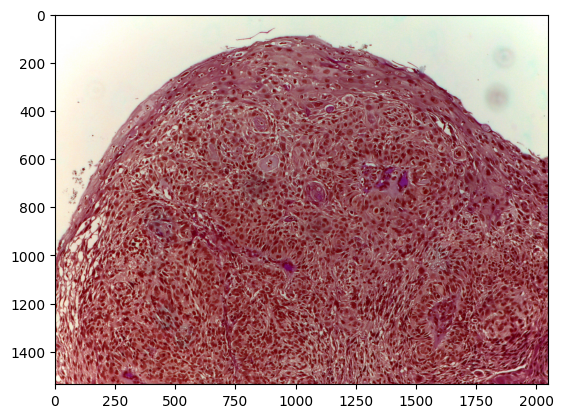

In [47]:
test_img = cv2.imread('/content/test/OSCC/OSCC_100x_112.jpg')
plt.imshow(test_img)

In [50]:
test_img.shape


(256, 256, 3)

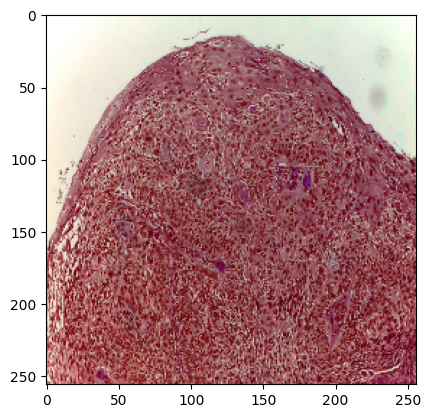

In [52]:
test_img = cv2.resize(test_img, (256, 256))
plt.imshow(test_img)

In [53]:
test_img.shape

(256, 256, 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 255, 253],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 255, 252],
        [255, 255, 255],
        [254, 254, 253]],

       ...,

       [[178,  92,  84],
        [254, 251, 232],
        [255, 239, 234],
        ...,
        [119,  27,  61],
        [150,  78, 112],
        [201, 117, 144]],

       [[189,  86,  92],
        [211, 148, 141],
        [185, 125,  92],
        ...,
        [117,  26,  45],
        [124,  39,  43],
        [185, 114, 133]],

       [[194,  92, 104],
        [187, 102, 109],
        [189, 105, 115],
        ...,
        [115,   7,  44],
        [168,  61,  98],
        [120,  44,  61]]], dtype=uint8)
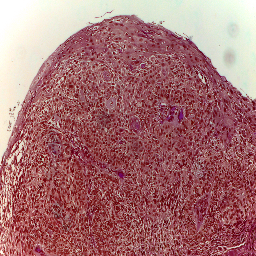

In [54]:
test_img

In [55]:
test_input = test_img.reshape(1, 256, 256, 3)
test_input

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [254, 255, 253],
         [254, 254, 254]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [254, 255, 252],
         [255, 255, 255],
         [254, 254, 253]],

        ...,

        [[178,  92,  84],
         [254, 251, 232],
         [255, 239, 234],
         ...,
         [119,  27,  61],
         [150,  78, 112],
         [201, 117, 144]],

        [[189,  86,  92],
         [211, 148, 141],
         [185, 125,  92],
         ...,
         [117,  26,  45],
         [124,  39,  43],
         [185, 114, 133]],

        [[194,  92, 104],
         [187, 102, 109],
         [189, 105, 115],
         ...,
         [115,   7,  44],
        

In [56]:
model.predict(test_input)
model.predict(test_input)[0]
model.predict(test_input)[0][0]

1/1 [==============================] - 0s 17ms/step


0.0

In [58]:
output = model.predict(test_input)[0][0]
print(f'Output is: {output} \n')

if output < 0.5:
  print('Normal Case')
else:
  print('Oral Cancer Detected')

1/1 [==============================] - 0s 21ms/step
Output is: 0.0 

Normal Case


In [59]:
def test_image(img_source):

  test_img = cv2.imread(img_source)
  test_img = cv2.resize(test_img, (256, 256))
  plt.imshow(test_img)
  test_input = test_img.reshape(1, 256, 256, 3)

  output = model.predict(test_input)[0][0]
  print(f'Output is: {output} \n')

  if output < 0.5:
    print('Normal')
  else:
    print('Oral Cancer Detected')

1/1 [==============================] - 0s 35ms/step
Output is: 1.0 

Oral Cancer Detected


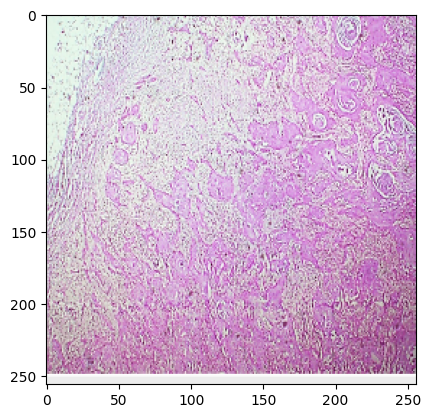

In [61]:
test_image('/content/delete.png')

1/1 [==============================] - 0s 21ms/step
Output is: 0.0 

Normal


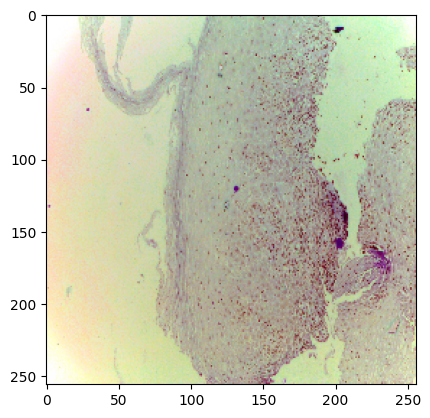

In [62]:
test_image('/content/test/Normal/Normal_100x_21.jpg')

1/1 [==============================] - 0s 42ms/step
Output is: 0.0 

Normal


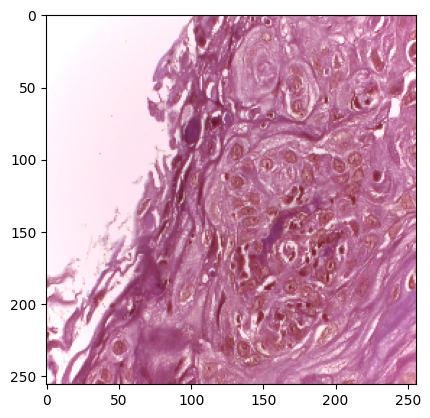

In [63]:
test_image('/content/test/Normal/Normal_400x_96.jpg')

1/1 [==============================] - 0s 34ms/step
Output is: 1.0 

Oral Cancer Detected


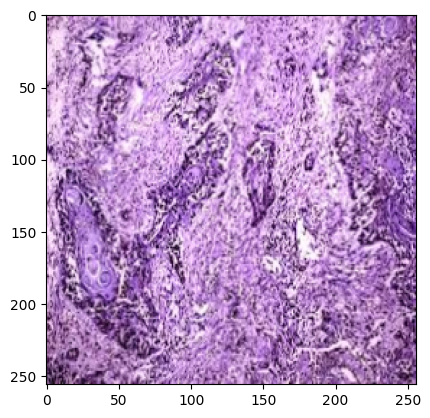

In [68]:
test_image('/content/del.jpg')